In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn_pandas import DataFrameMapper



import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve


In [28]:
train_data = pd.read_csv('WikiLarge_Train.csv')
test_data = pd.read_csv('WikiLarge_Test.csv')
# sample_submission = pd.read_csv('sampleSubmission.csv')

In [29]:
aoa_aggregated_train=pd.read_csv("AoA_countfeatures_traindata.csv").fillna(0)
aoa_aggregated_test=pd.read_csv("AoA_countfeatures_testdata.csv").fillna(0)
print(aoa_aggregated_train.shape)
print(aoa_aggregated_test.shape,"\n---------------\n")


aoa_numerical_train=pd.read_csv("aoa_features_traindata.csv").fillna(0)
aoa_numerical_test=pd.read_csv("aoa_features_testdata.csv").fillna(0)
print(aoa_numerical_train.shape)
print(aoa_numerical_test.shape,"\n---------------\n")



numerical_train=pd.read_csv("only_numeric_features_traindata.csv").fillna(0)
numerical_test=pd.read_csv("only_numeric_features_testdata.csv").fillna(0)
print(numerical_train.shape)
print(numerical_test.shape,"\n---------------\n")

pos_tag_train=pd.read_csv("pos_tag_traindata.csv").fillna(0)
pos_tag_test=pd.read_csv("pos_tag_testdata.csv").fillna(0)
print(pos_tag_train.shape)
print(pos_tag_test.shape,"\n---------------\n")

concreteness_aggregated_train=pd.read_csv("concreteness_features_traindata.csv").fillna(0)
concreteness_aggregated_test=pd.read_csv("concreteness_features_testdata.csv").fillna(0)
print(concreteness_aggregated_train.shape)
print(concreteness_aggregated_test.shape,"\n---------------\n")

concreteness_numerical_train=pd.read_csv("concreteness_numerical_features_traindata.csv").fillna(0)
concreteness_numerical_test=pd.read_csv("concreteness_numerical_features_testdata.csv").fillna(0)
print(concreteness_numerical_train.shape)
print(concreteness_numerical_test.shape,"\n---------------\n")


readability_train=pd.read_csv("readability_scores_included_train.csv").fillna(0).drop(['Unnamed: 0', 'original_text', 'label', 'clean_text'],axis=1)
readability_test=pd.read_csv("readability_scores_included_test.csv").fillna(0).drop(['Unnamed: 0', 'original_text', 'label', 'clean_text',"id"],axis=1)
print(readability_train.columns)


X_train_numerical = pd.concat([aoa_aggregated_train,aoa_numerical_train,numerical_train,pos_tag_train,concreteness_aggregated_train,concreteness_numerical_train,readability_train], axis=1).fillna(0)

X_test_numerical = pd.concat([aoa_aggregated_test,aoa_numerical_test,numerical_test,pos_tag_test,concreteness_aggregated_test,concreteness_numerical_test,readability_test], axis=1).fillna(0)

print(X_train_numerical.shape)

print(X_test_numerical.shape)

X_train_numerical=X_train_numerical.drop(["Unnamed: 0"],axis=1)
X_test_numerical=X_test_numerical.drop(["Unnamed: 0"],axis=1)
train_x_numerical=X_train_numerical.copy()
test_x_numerical=X_test_numerical.copy()

train_numerical_columns=X_train_numerical.columns
test_numerical_columns=X_test_numerical.columns

(416768, 11)
(119092, 11) 
---------------

(416768, 12)
(119092, 12) 
---------------

(416768, 11)
(119092, 11) 
---------------

(416768, 40)
(119092, 40) 
---------------

(416768, 8)
(119092, 8) 
---------------

(416768, 13)
(119092, 13) 
---------------

Index(['dale_chall_score', 'flesch reading ease score', 'gunning fog',
       'flesch kincaid grade level', 'coleman liau index', 'smog index',
       'automated readability index', 'linsear write formula'],
      dtype='object')
(416768, 103)
(119092, 103)


In [30]:
y_train = pd.read_csv('WikiLarge_Train.csv')["label"]
y_test= pd.read_csv('WikiLarge_Test.csv')["label"]

In [31]:
# Create correlation matrix
corr_matrix = X_train_numerical.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_train_numerical=X_train_numerical.drop(X_train_numerical[to_drop], axis=1)
X_test_numerical=X_test_numerical.drop(X_test_numerical[to_drop],axis=1)
train_numerical_columns=X_train_numerical.columns
test_numerical_columns=X_test_numerical.columns

In [32]:
scaler = StandardScaler()
# transform data
X_train_numerical = scaler.fit_transform(X_train_numerical)
# X_test=scaler.transform(X_test)
X_test_numerical = scaler.transform(X_test_numerical)

Tuning hyper-parameters for accuracy
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................C=0.001; total time=   1.9s
[CV] END ............................................C=0.001; total time=   2.1s
[CV] END ............................................C=0.001; total time=   2.1s
[CV] END ............................................C=0.001; total time=   2.3s
[CV] END ............................................C=0.001; total time=   2.3s
[CV] END .............................................C=0.01; total time=   3.1s
[CV] END .............................................C=0.01; total time=   3.1s
[CV] END .............................................C=0.01; total time=   3.3s
[CV] END .............................................C=0.01; total time=   3.1s
[CV] END .............................................C=0.01; total time=   3.4s
[CV] END ..............................................C=0.1; total time=   3.3s
[CV] END ...

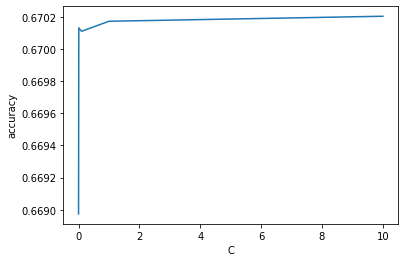

0.669 for {'C': 0.001}
0.670 for {'C': 0.01}
0.670 for {'C': 0.1}
0.670 for {'C': 1}
0.670 for {'C': 10}


In [33]:
scores = ["accuracy"]
for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
    log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,verbose=2,scoring=score) 
    tic = time()
    log_grid.fit(X_train_numerical, y_train)
    toc = time()
    print(f"Done in {toc - tic:.3f}s")
    print("Best parameters set found on training data:\n")
    print(log_grid.best_params_)
    print("Grid scores on training data:\n")
    means = log_grid.cv_results_['mean_test_score']
    fig, ax = plt.subplots()
    a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
    ax.set_xlabel('C')
    ax.set_ylabel(score)
    plt.show()
    for mean,params in zip(means,log_grid.cv_results_['params']):
        print("%0.3f for %r"% (mean, params))
# predictions=log_grid.best_estimator_.predict(X_test_numerical)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/Logistic_regression_numerical_features_only_tfid_vectoriser",index=False)

In [34]:
model = SelectFromModel(log_grid.best_estimator_, prefit=True)

In [35]:
train_data_best_features=model.transform(X_train_numerical)
test_data_best_features=model.transform(X_test_numerical)

In [36]:
train_numerical_columns[model.get_support()]

Index(['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
       'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
       'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
       'flesch reading ease score', 'flesch kincaid grade level',
       'coleman liau index', 'automated readability index',
       'linsear write formula'],
      dtype='object')

In [37]:
train_data = pd.read_csv('WikiLarge_Train.csv')
test_data = pd.read_csv('WikiLarge_Test.csv')

X_train_numerical=train_x_numerical[['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
       'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
       'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
       'flesch reading ease score', 'flesch kincaid grade level',
       'coleman liau index', 'automated readability index',
       'linsear write formula']]
X_test_numerical=test_x_numerical[['words_less5_phonemes', 'perc_known_less_20', 'aoa_kup', 'aoa_kup_lem',
       'perc_known', 'perc_known_lem', 'lexical_diversity', '3_syllable_count',
       'noun_common', 'noun_common_plural', 'verb_past', 'pronoun_personal',
       'flesch reading ease score', 'flesch kincaid grade level',
       'coleman liau index', 'automated readability index',
       'linsear write formula']]
scaler = MinMaxScaler()
# transform data
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical))
# X_test=scaler.transform(X_test)
X_test_numerical = pd.DataFrame(scaler.transform(X_test_numerical))


In [38]:
test_data.columns

Index(['id', 'original_text', 'label'], dtype='object')

In [39]:
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

train_data = pd.concat([train_data,X_train_numerical], axis=1).fillna(0)

test_data = pd.concat([test_data,X_test_numerical], axis=1).fillna(0)
# Set X and y
train_data = train_data.drop(['label'],axis=1)

test_data=test_data.drop(['label','id'],axis=1)

# initialise model and vectorizers
vectorizer1 = TfidfVectorizer()
# construct the column transfomer
column_transformer = ColumnTransformer([('tfidf1', vectorizer1,'original_text')],remainder='passthrough')

# fit the model
pipe = Pipeline([('tfidf', column_transformer)])
pipe.fit(train_data,y_train)

Pipeline(steps=[('tfidf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidf1', TfidfVectorizer(),
                                                  'original_text')]))])

In [40]:
train_data.shape

(416768, 18)

In [41]:
test_data.shape

(119092, 18)

In [42]:
X_train=pipe.transform(train_data)
X_test=pipe.transform(test_data)

In [43]:
X_train.shape

(416768, 142358)

Tuning hyper-parameters for recall
Done in 2.648s
Best parameters set found on training data:

{'alpha': 10}
Grid scores on training data:



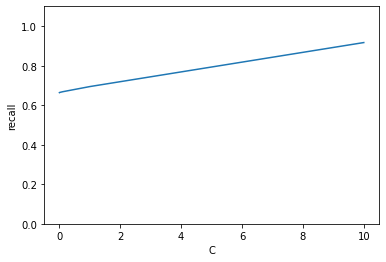

0.664 for {'alpha': 0.001}
0.664 for {'alpha': 0.01}
0.668 for {'alpha': 0.1}
0.694 for {'alpha': 1}
0.917 for {'alpha': 10}

 For the model with the best recall


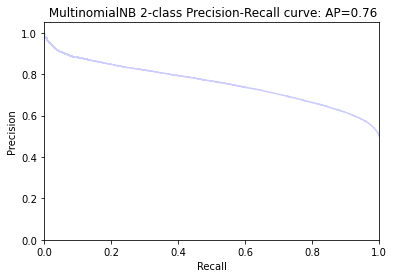

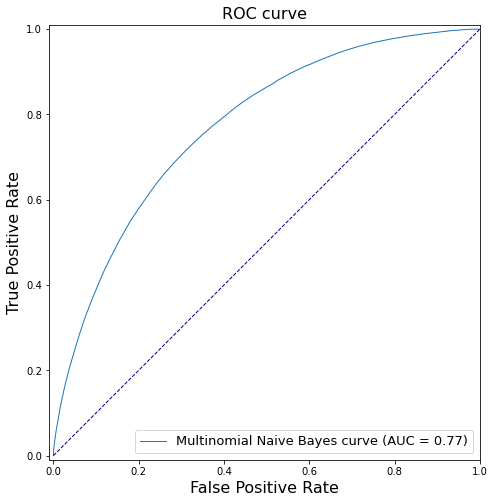

In [44]:
score = 'recall'

print("Tuning hyper-parameters for %s" % score)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
mnb_grid = GridSearchCV(MultinomialNB(), param_grid, cv=5,scoring=score) 
tic = time()
mnb_grid.fit(X_train, y_train)
toc = time()
mnbtime=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(mnb_grid.best_params_)
print("Grid scores on training data:\n")
means = mnb_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylim([0,1.1])
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,mnb_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)

y_score = mnb_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' MultinomialNB 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Multinomial Naive Bayes',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
# predictions=mnb_grid.best_estimator_.predict(X_test_minmax)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/MultinomialNB_text_features_only_tfid_vectoriser",index=False)


# mglearn.tools.visualize_coefficients(mnb_grid.best_estimator_.coef_,feature_names, n_top_features=40)



Tuning hyper-parameters for accuracy
Done in 2.253s
Best parameters set found on training data:

{'alpha': 1}
Grid scores on training data:



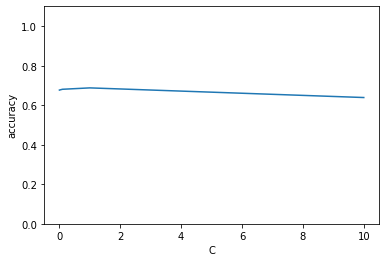

0.676 for {'alpha': 0.001}
0.677 for {'alpha': 0.01}
0.681 for {'alpha': 0.1}
0.688 for {'alpha': 1}
0.639 for {'alpha': 10}

 For the model with the best accuracy


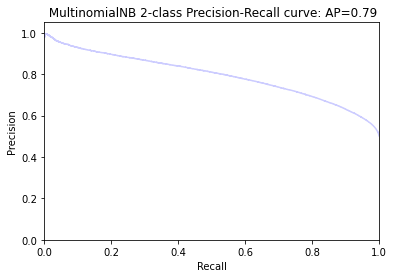

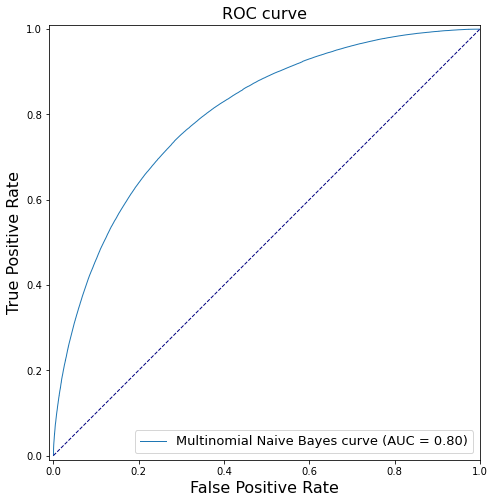

In [46]:
score = 'accuracy'

print("Tuning hyper-parameters for %s" % score)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
mnb_grid = GridSearchCV(MultinomialNB(), param_grid, cv=5,scoring=score) 
tic = time()
mnb_grid.fit(X_train, y_train)
toc = time()
mnbtime=toc-tic
print(f"Done in {toc - tic:.3f}s")
print("Best parameters set found on training data:\n")
print(mnb_grid.best_params_)
print("Grid scores on training data:\n")
means = mnb_grid.cv_results_['mean_test_score']
fig, ax = plt.subplots()
a = ax.plot([0.001, 0.01, 0.1, 1, 10],means)
ax.set_xlabel('C')
ax.set_ylim([0,1.1])
ax.set_ylabel(score)
plt.show()
for mean,params in zip(means,mnb_grid.cv_results_['params']):
    print("%0.3f for %r"% (mean, params))
print("\n For the model with the best "+ score)

y_score = mnb_grid.best_estimator_.predict_proba(X_train)[:,-1]
precision, recall, _ = precision_recall_curve(y_train, y_score)
average_precision = average_precision_score(y_train, y_score)
plt.plot(recall, precision, color='b', alpha=0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(' MultinomialNB 2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=1, label='{} curve (AUC = {:0.2f})'.format('Multinomial Naive Bayes',roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
# predictions=mnb_grid.best_estimator_.predict(X_test_minmax)
# list_of_tuples = list(zip(np.arange(len(predictions)),predictions))
# df = pd.DataFrame(list_of_tuples,columns = ['id', 'label']) 
# df.to_csv("baseline_submissions/MultinomialNB_text_features_only_tfid_vectoriser",index=False)

# mglearn.tools.visualize_coefficients(mnb_grid.best_estimator_.coef_,feature_names, n_top_features=40)


